In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Data

In [48]:
data = pd.read_csv("owid-covid-data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [49]:
spain_data = data[data['location'] == 'Spain']
germany_data = data[data['location'] == 'Germany']
france_data = data[data['location'] == 'France']
australia_data = data[data['location'] == 'Australia']
iran_data = data[data['location'] == 'Iran']
canada_data = data[data['location'] == 'Egypt']

# Data Preprocessing

In [5]:
spain_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [38]:
statistical_columns = ['population', 'population_density', 'total_cases', 'total_deaths',
'gdp_per_capita', 'human_development_index', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand']
timeseries_columns = ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'new_tests', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations']

In [33]:
statistical_data_spain = spain_data[statistical_columns].iloc[-1]
statistical_data_spain['country'] = 'spain'
statistical_data_germany = germany_data[statistical_columns].iloc[-1]
statistical_data_germany['country'] = 'germany'
statistical_data_france = france_data[statistical_columns].iloc[-1]
statistical_data_france['country'] = 'france'
statistical_data_australia = australia_data[statistical_columns].iloc[-1]
statistical_data_australia['country'] = 'australlia'

statistical_data_iran = iran_data[statistical_columns].iloc[-1]
statistical_data_iran['country'] = 'iran'

statistical_data_canada = canada_data[statistical_columns].iloc[-1]
statistical_data_canada['country'] = 'egypt'


In [34]:
statistical_data_spain

population                    46745211.0
population_density                93.105
total_cases                   11627487.0
total_deaths                    103104.0
gdp_per_capita                  34272.36
human_development_index            0.904
diabetes_prevalence                 7.17
female_smokers                      27.4
male_smokers                        31.4
hospital_beds_per_thousand          2.97
country                            spain
Name: 152851, dtype: object

In [35]:
 df = pd.DataFrame(data = [statistical_data_australia, statistical_data_germany, statistical_data_france, statistical_data_spain, statistical_data_canada, statistical_data_iran])
df.to_csv('statistical_data.csv')

In [36]:
df

,population,population_density,total_cases,total_deaths,gdp_per_capita,human_development_index,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,country
10249,25788217.0,3.202,5459012.0,6804.0,44648.710,0.944,5.07,13.0,16.5,3.84,australlia
61797,83900471.0,237.016,23459628.0,132960.0,45229.245,0.947,8.31,28.2,33.1,8.00,germany
57905,67422000.0,122.578,27844621.0,144274.0,38605.671,0.901,4.77,30.1,35.6,5.98,france
152851,46745211.0,93.105,11627487.0,103104.0,34272.360,0.904,7.17,27.4,31.4,2.97,spain
47689,104258327.0,97.999,511977.0,24522.0,10550.206,0.707,17.31,0.2,50.1,1.60,egypt
77818,85028760.0,49.831,7208968.0,140854.0,19082.620,0.783,9.59,0.8,21.1,1.50,iran


In [50]:
ts_data_spain = spain_data[timeseries_columns]
ts_data_spain.to_csv('spain_data.csv')
ts_data_germany = germany_data[timeseries_columns]
ts_data_germany.to_csv('germany_data.csv')
ts_data_france = france_data[timeseries_columns]
ts_data_france.to_csv('france_data.csv')
ts_data_australia = australia_data[timeseries_columns]
ts_data_australia.to_csv('australia_data.csv')

ts_data_iran = iran_data[timeseries_columns]
ts_data_iran.to_csv('iran_data.csv')

ts_data_canada = canada_data[timeseries_columns]
ts_data_canada.to_csv('egypt_data.csv')


In [51]:
ts_data_canada.isnull().sum()

date                         0
total_cases                  0
new_cases                    0
total_deaths                23
new_deaths                  23
total_tests                790
new_tests                  795
people_vaccinated          721
people_fully_vaccinated    725
new_vaccinations           786
dtype: int64

In [52]:
ts_data_australia.isnull().sum()

date                         0
total_cases                  0
new_cases                    2
total_deaths                35
new_deaths                  38
total_tests                 41
new_tests                   42
people_vaccinated          401
people_fully_vaccinated    403
new_vaccinations           406
dtype: int64

In [53]:
ts_data_france.isnull().sum()

date                         0
total_cases                  0
new_cases                   10
total_deaths                22
new_deaths                  29
total_tests                114
new_tests                  114
people_vaccinated          339
people_fully_vaccinated    345
new_vaccinations           340
dtype: int64

In [40]:
df = pd.DataFrame(data = [ts_data_australia, ts_data_canada, ts_data_france, ts_data_germany, ts_data_iran, ts_data_spain])
df.to_csv('timeseries_data.csv')

In [41]:
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,people_vaccinated,people_fully_vaccinated,new_vaccinations,country
10249,2022-04-18,5459012.0,42032.0,6804.0,17.0,68374034.0,59415.0,22253815.0,21441137.0,4688.0,australlia
47689,2022-04-18,511977.0,0.0,24522.0,0.0,NaN,NaN,NaN,NaN,NaN,egypt
57905,2022-04-18,27844621.0,19810.0,144274.0,48.0,NaN,NaN,NaN,NaN,NaN,france
61797,2022-04-18,23459628.0,22483.0,132960.0,7.0,NaN,NaN,63726513.0,63262949.0,1323.0,germany
77818,2022-04-18,7208968.0,2009.0,140854.0,25.0,50484026.0,NaN,64203988.0,57374503.0,71817.0,iran
152851,2022-04-18,11627487.0,0.0,103104.0,0.0,NaN,NaN,NaN,NaN,NaN,spain


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 9

regression_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

X = np.array(cleaned_iran_data.index)
y = cleaned_iran_data['new_tests']

regression_model.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

<ipython-input-14-cacaea2b120e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['new_tests_reg'] = new_tests_reg


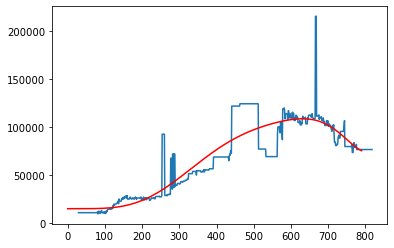

In [14]:
plt.plot(X, y)
X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
new_tests_reg = regression_model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
plt.show()

In [15]:
cleaned_iran_data.to_csv("covid19_iran.csv")
cleaned_iran_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,new_tests_reg
29,2020-02-19,2.0,2.0,2.0,2.0,10418.0,14565.162432
30,2020-02-20,5.0,3.0,2.0,0.0,10418.0,14565.162432
31,2020-02-21,18.0,13.0,4.0,2.0,10418.0,14565.162435
32,2020-02-22,28.0,10.0,5.0,1.0,10418.0,14565.162453
33,2020-02-23,43.0,15.0,8.0,3.0,10418.0,14565.162521


In [16]:
best_deg = 10007520573471
best_model = np.nan
from sklearn.metrics import mean_squared_error
for deg in range(1, 25):

    regression_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    X = np.array(cleaned_iran_data.index)
    y = cleaned_iran_data['new_cases']
    regression_model.fit(X.reshape(-1, 1), y)
    X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
    y_pred = regression_model.predict(X_seq)
    curr_err = mean_squared_error(y_pred, y)
    print(f"current error : {curr_err}, deg : {deg}")
    if curr_err < err:
        print(f"new deg found! {deg}")
        best_deg = deg
        best_model = regression_model
        err = curr_err

print(best_deg)

current error : 72484090.26501708, deg : 1


NameError: name 'err' is not defined

AttributeError: 'float' object has no attribute 'predict'

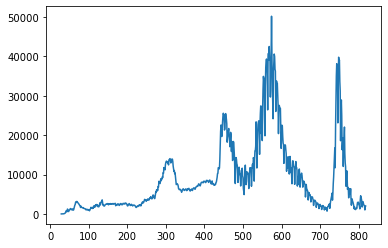

In [17]:
plt.plot(X, y)
X_seq = np.linspace(0,cleaned_iran_data.shape[0], 790).reshape(-1, 1)
new_tests_reg = best_model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
plt.show()

/home/poj/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06185e-54): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/tmp/ipykernel_34866/700748534.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_iran_data['new_tests_reg'] = new_tests_reg


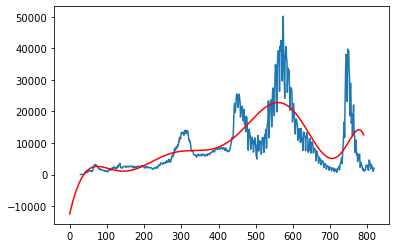

In [78]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, ARDRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
model = make_pipeline(PolynomialFeatures(9), Ridge())
#model = GaussianProcessRegressor()
X = np.array(cleaned_iran_data.index)
y = cleaned_iran_data['new_cases']
model.fit(X.reshape(-1, 1), y)
plt.plot(X, y)
X_seq = np.linspace(0,790, 790).reshape(-1, 1)
new_tests_reg = model.predict(X_seq)
plt.plot(X_seq, new_tests_reg, color = 'red')
cleaned_iran_data['new_tests_reg'] = new_tests_reg
#print(mean_squared_error(new_tests_reg, y))
plt.show()

In [18]:
cleaned_iran_data.to_csv("clean_data.csv")

# Data Visualization

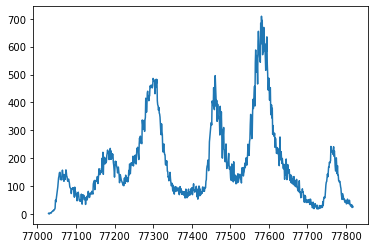

In [60]:
plt.plot(iran_data.index, iran_data['new_deaths'])

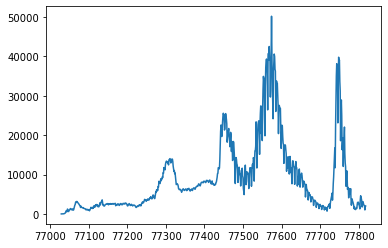

In [61]:
plt.plot(iran_data.index, iran_data['new_cases'])